#Pre-Processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

print(df.info())
print(df.describe())
print(df['alert'].value_counts())

label_encoder = LabelEncoder()
df['alert_encoded'] = label_encoder.fit_transform(df['alert'])

alert_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Alert encoding:", alert_mapping)

X = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig']]
y = df['alert_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None
         magnitude        depth          cdi          mmi          sig
count  1300.000000  1300.000000  1300.000000  1300.000000  1300.000000
mean      7.061008    50.321538     6.976154     6.939231    -9.749231
std       0.423738   104.348286     2.244875     1.354774    62.245214
min       6.500000     2.000000     0.000000     1.000000  -128.000000
25%       6.700000    12.000000     6.000000     6.000000   -54.000000
50%       7.000000    19.000000     8.000000     7.000000    -7.000000
75%       7.300000 

In [ ]:
print(X_scaled[:5])

[[-0.14403054 -0.34821383  0.4562572   0.0448729   0.15668647]
 [-0.38011641 -0.24275706 -1.32626529 -2.17037156 -0.3736788 ]
 [-0.14403054  5.06842938 -1.77189591 -2.90878638 -0.05224531]
 [ 0.56422707 -0.12771331 -0.88063467 -1.43195674  1.20134532]
 [-1.08837401  5.49984344 -3.10878777 -3.6472012  -1.41833766]]


In [ ]:
print(y.head(20))

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     3
9     3
10    3
11    0
12    0
13    3
14    1
15    0
16    3
17    0
18    0
19    0
Name: alert_encoded, dtype: int64


# EDA

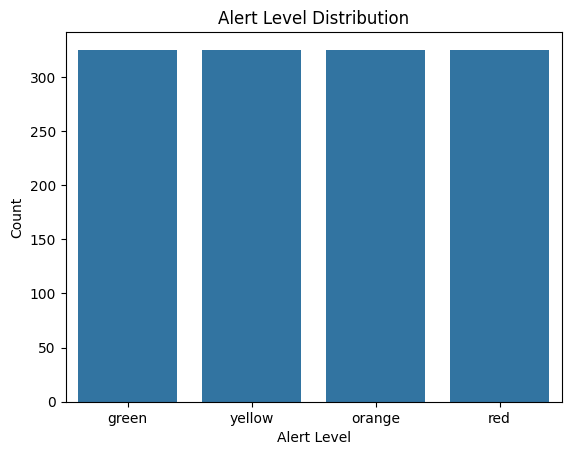

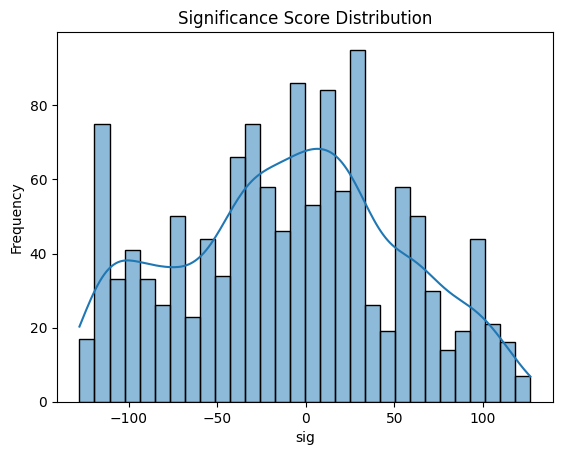

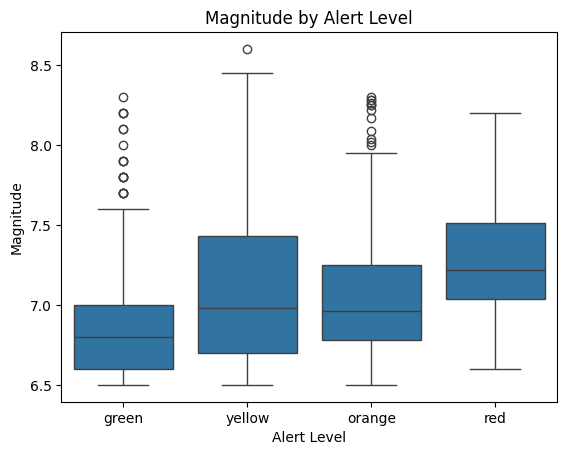

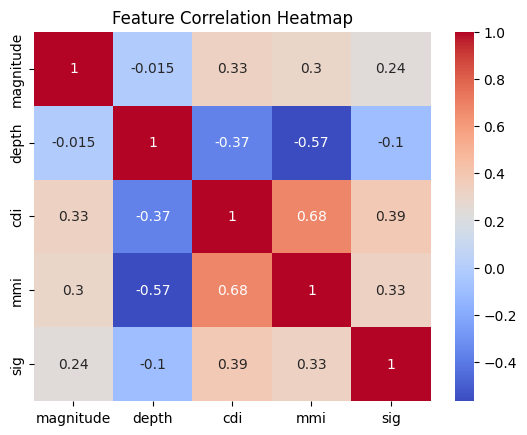

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("earthquake_alert_balanced_dataset.csv")

df['alert_encoded'] = pd.Categorical(df['alert']).codes

sns.countplot(x='alert', data=df)
plt.title("Alert Level Distribution")
plt.xlabel("Alert Level")
plt.ylabel("Count")
plt.show()

sns.histplot(df['sig'], bins=30, kde=True)
plt.title("Significance Score Distribution")
plt.xlabel("sig")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x='alert', y='magnitude', data=df)
plt.title("Magnitude by Alert Level")
plt.xlabel("Alert Level")
plt.ylabel("Magnitude")
plt.show()

corr = df[['magnitude', 'depth', 'cdi', 'mmi', 'sig']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()